## Fase 0: Preparación y Configuración del Entorno

In [1]:
# 1. Importar librerías necesarias
import pandas as pd
import os
print("Librerías importadas (pandas, os)")

# 2. Definir las rutas de los directorios
# Directorio base donde se ejecuta el notebook
base_dir = '/home/alumno09/TareaADO'

# Directorio donde se encuentran los ficheros VEP de entrada
directorio_datos = os.path.join(base_dir, 'VEP')

# Directorio donde se guardarán las tablas generadas
directorio_salida = os.path.join(base_dir, 'tablas')

print(f"Directorio de datos: {directorio_datos}")
print(f"Directorio de salida: {directorio_salida}")

# 3. Crear el directorio de salida si no existe
# Esto previene errores si el script se ejecuta por primera vez
if not os.path.exists(directorio_salida):
    os.makedirs(directorio_salida)
    print(f"Directorio de salida creado en: {directorio_salida}")
else:
    print("El directorio de salida ya existe.")

# 4. Definir la lista de identificadores de pacientes
# Esto nos permitirá iterar fácilmente sobre cada paciente
pacientes = ['PAC1', 'PAC3', 'PAC4']
print(f"Pacientes a analizar: {pacientes}")

print("\n---\nTodo listo para empezar el análisis.")

Librerías importadas (pandas, os)
Directorio de datos: /home/alumno09/TareaADO/VEP
Directorio de salida: /home/alumno09/TareaADO/tablas
El directorio de salida ya existe.
Pacientes a analizar: ['PAC1', 'PAC3', 'PAC4']

---
Todo listo para empezar el análisis.


## Fase 1: Bucle Principal de Análisis - Identificación de Variantes Somáticas

In [2]:
print("Iniciando Fase 1: Análisis de variantes somáticas para cada paciente.")
print("="*60)

# El bucle principal que procesará cada paciente definido en la Fase 0
for paciente in pacientes:
    print(f"\n  Procesando paciente: {paciente}")

    try:
        # --- 1. Carga de datos del paciente (CORRECCIÓN APLICADA) ---
        print(f"    Cargando ficheros para {paciente}...")

        # Construir las rutas completas a los ficheros de este paciente
        ruta_linfocito = os.path.join(directorio_datos, f'{paciente}_Linfocito_80.txt')
        ruta_cirrotico = os.path.join(directorio_datos, f'{paciente}_Cirrotico_80.txt')
        ruta_cancer = os.path.join(directorio_datos, f'{paciente}_Cancer_80.txt')

        # Cargar los datos en DataFrames de Pandas
        # SE HA ELIMINADO el parámetro 'comment'#' para que lea la cabecera correctamente.
        df_linfocito = pd.read_csv(ruta_linfocito, sep='\t', low_memory=False)
        df_cirrotico = pd.read_csv(ruta_cirrotico, sep='\t', low_memory=False)
        df_cancer = pd.read_csv(ruta_cancer, sep='\t', low_memory=False)
        
        # Pequeña limpieza: renombramos la primera columna para quitar el '#'
        for df in [df_linfocito, df_cirrotico, df_cancer]:
            df.rename(columns={'#Uploaded_variation': 'Uploaded_variation'}, inplace=True)
            
        print(f"    Ficheros de {paciente} cargados correctamente.")


        # --- 2. Creación de Identificadores Únicos ('variant_id') ---
        for df, tipo in zip([df_linfocito, df_cirrotico, df_cancer], ['Linfocito', 'Cirrótico', 'Cáncer']):
            df['variant_id'] = df['Location'].astype(str) + '_' + df['Allele'].astype(str)
        print("    Identificadores de variantes (variant_id) creados.")


        # --- 3. Análisis Cirrótico (Cirrótico - Linfocito) ---
        ids_linfocito = set(df_linfocito['variant_id'])
        df_cirrotico_somatico = df_cirrotico[~df_cirrotico['variant_id'].isin(ids_linfocito)].copy()

        ruta_salida_cirrotico = os.path.join(directorio_salida, f'{paciente}_variantes_cirroticas.tsv')
        df_cirrotico_somatico.to_csv(ruta_salida_cirrotico, sep='\t', index=False)
        print(f"    Análisis Cirrótico: {len(df_cirrotico_somatico)} variantes somáticas encontradas.")
        print(f"      -> Guardado en: {ruta_salida_cirrotico}")


        # --- 4. Análisis Tumoral (Cáncer - Linfocito - Cirrótico) ---
        ids_background = set(df_linfocito['variant_id']).union(set(df_cirrotico['variant_id']))
        df_cancer_somatico = df_cancer[~df_cancer['variant_id'].isin(ids_background)].copy()
        
        ruta_salida_cancer = os.path.join(directorio_salida, f'{paciente}_variantes_tumorales.tsv')
        df_cancer_somatico.to_csv(ruta_salida_cancer, sep='\t', index=False)
        print(f"    Análisis Tumoral: {len(df_cancer_somatico)} variantes de novo encontradas.")
        print(f"      -> Guardado en: {ruta_salida_cancer}")


    except FileNotFoundError as e:
        print(f"    ERROR: No se encontró uno de los ficheros para el paciente {paciente}.")
        print(f"      Detalle del error: {e}")
    except Exception as e:
        print(f"    ERROR: Ocurrió un error inesperado procesando al paciente {paciente}.")
        print(f"      Detalle del error: {e}")

print(" Fase 1 completada. Todos los pacientes han sido procesados.")

Iniciando Fase 1: Análisis de variantes somáticas para cada paciente.

  Procesando paciente: PAC1
    Cargando ficheros para PAC1...
    Ficheros de PAC1 cargados correctamente.
    Identificadores de variantes (variant_id) creados.
    Análisis Cirrótico: 28126 variantes somáticas encontradas.
      -> Guardado en: /home/alumno09/TareaADO/tablas/PAC1_variantes_cirroticas.tsv
    Análisis Tumoral: 24930 variantes de novo encontradas.
      -> Guardado en: /home/alumno09/TareaADO/tablas/PAC1_variantes_tumorales.tsv

  Procesando paciente: PAC3
    Cargando ficheros para PAC3...
    Ficheros de PAC3 cargados correctamente.
    Identificadores de variantes (variant_id) creados.
    Análisis Cirrótico: 35430 variantes somáticas encontradas.
      -> Guardado en: /home/alumno09/TareaADO/tablas/PAC3_variantes_cirroticas.tsv
    Análisis Tumoral: 972 variantes de novo encontradas.
      -> Guardado en: /home/alumno09/TareaADO/tablas/PAC3_variantes_tumorales.tsv

  Procesando paciente: PAC4
 

## Fase 2a: Agregación y Deduplicación de Variantes por Tipo de Tejido

In [3]:
print(" Iniciando Fase 2a: Agregación y deduplicación de variantes para todos los tipos de tejido.")

def agregar_y_deduplicar(lista_dataframes):
    """
    Función auxiliar para concatenar, encontrar variantes únicas y agregar
    la información de los pacientes.
    """
    if not lista_dataframes:
        return None
    
    # 1. Concatenar todos los DataFrames
    df_concatenado = pd.concat(lista_dataframes, ignore_index=True)
    
    # 2. Definir columnas de agrupación (todas excepto 'Paciente')
    columnas_agrupacion = [col for col in df_concatenado.columns if col != 'Paciente']
    
    # 3. Agrupar por variantes idénticas y agregar los pacientes que la contienen
    df_agregado = df_concatenado.groupby(columnas_agrupacion, as_index=False).agg(
        # La nueva columna 'Pacientes' contendrá un string con los pacientes
        Pacientes=('Paciente', lambda x: ', '.join(sorted(x.unique())))
    )
    
    # 4. Añadir columna con el recuento de pacientes para facilitar el filtrado
    df_agregado['Num_Pacientes'] = df_agregado['Pacientes'].apply(lambda x: len(x.split(', ')))
    
    # 5. Reordenar columnas para mayor claridad y ordenar por recurrencia
    columnas_finales = ['Pacientes', 'Num_Pacientes'] + columnas_agrupacion
    df_agregado = df_agregado[columnas_finales].sort_values(by='Num_Pacientes', ascending=False)
    
    return df_agregado

#==============================================================================
# 1. AGREGACIÓN DE VARIANTES CIRRÓTICAS SOMÁTICAS
#==============================================================================
print("\n" + "="*60)
print("1. Agregando variantes CIRRÓTICAS...")

lista_df_cirroticos = []
for paciente in pacientes:
    ruta_fichero = os.path.join(directorio_salida, f'{paciente}_variantes_cirroticas.tsv')
    try:
        df_paciente = pd.read_csv(ruta_fichero, sep='\t', low_memory=False)
        df_paciente['Paciente'] = paciente
        lista_df_cirroticos.append(df_paciente)
        print(f"  -> Cargado {os.path.basename(ruta_fichero)}")
    except FileNotFoundError:
        print(f"  ->   ADVERTENCIA: No se encontró el fichero {os.path.basename(ruta_fichero)}. Se omitirá.")

df_cirroticos_agregado = agregar_y_deduplicar(lista_df_cirroticos)

if df_cirroticos_agregado is not None:
    ruta_agregado = os.path.join(directorio_salida, 'TODOS_PACIENTES_variantes_cirroticas_unicas.tsv')
    df_cirroticos_agregado.to_csv(ruta_agregado, sep='\t', index=False)
    print(f"\n Agregación Cirrótica completada. Total: {len(df_cirroticos_agregado)} variantes ÚNICAS.")
    print(f"   -> Guardado en: {ruta_agregado}")
else:
    print("\n No se cargaron ficheros cirróticos.")


#==============================================================================
# 2. AGREGACIÓN DE VARIANTES TUMORALES SOMÁTICAS (DE NOVO)
#==============================================================================
print("\n" + "="*60)
print("2. Agregando variantes TUMORALES...")

lista_df_tumorales = []
for paciente in pacientes:
    ruta_fichero = os.path.join(directorio_salida, f'{paciente}_variantes_tumorales.tsv')
    try:
        df_paciente = pd.read_csv(ruta_fichero, sep='\t', low_memory=False)
        df_paciente['Paciente'] = paciente
        lista_df_tumorales.append(df_paciente)
        print(f"  -> Cargado {os.path.basename(ruta_fichero)}")
    except FileNotFoundError:
        print(f"  ->   ADVERTENCIA: No se encontró el fichero {os.path.basename(ruta_fichero)}. Se omitirá.")

df_tumorales_agregado = agregar_y_deduplicar(lista_df_tumorales)

if df_tumorales_agregado is not None:
    ruta_agregado = os.path.join(directorio_salida, 'TODOS_PACIENTES_variantes_tumorales_unicas.tsv')
    df_tumorales_agregado.to_csv(ruta_agregado, sep='\t', index=False)
    print(f"\n Agregación Tumoral completada. Total: {len(df_tumorales_agregado)} variantes ÚNICAS.")
    print(f"   -> Guardado en: {ruta_agregado}")
else:
    print("\n No se cargaron ficheros tumorales.")

#==============================================================================
# 3. AGREGACIÓN DE VARIANTES DE LÍNEA BASE (LINFOCITOS ORIGINALES)
#==============================================================================
print("\n" + "="*60)
print("3. Agregando variantes de LINFOCITOS (línea base)...")

lista_df_linfocitos = []
for paciente in pacientes:
    ruta_fichero = os.path.join(directorio_datos, f'{paciente}_Linfocito_80.txt')
    try:
        df_paciente = pd.read_csv(ruta_fichero, sep='\t', low_memory=False)
        df_paciente.rename(columns={'#Uploaded_variation': 'Uploaded_variation'}, inplace=True)
        df_paciente['Paciente'] = paciente
        lista_df_linfocitos.append(df_paciente)
        print(f"  -> Cargado {os.path.basename(ruta_fichero)}")
    except FileNotFoundError:
        print(f"  ->   ADVERTENCIA: No se encontró el fichero {os.path.basename(ruta_fichero)}. Se omitirá.")

df_linfocitos_agregado = agregar_y_deduplicar(lista_df_linfocitos)

if df_linfocitos_agregado is not None:
    ruta_agregado = os.path.join(directorio_salida, 'TODOS_PACIENTES_linfocitos_original_unicas.tsv')
    df_linfocitos_agregado.to_csv(ruta_agregado, sep='\t', index=False)
    print(f"\n Agregación de Linfocitos completada. Total: {len(df_linfocitos_agregado)} variantes ÚNICAS.")
    print(f"   -> Guardado en: {ruta_agregado}")
else:
    print("\n No se cargaron ficheros de linfocitos.")

print(" Fase 2a completada. Se han generado los 3 ficheros agregados y deduplicados.")

 Iniciando Fase 2a: Agregación y deduplicación de variantes para todos los tipos de tejido.

1. Agregando variantes CIRRÓTICAS...
  -> Cargado PAC1_variantes_cirroticas.tsv
  -> Cargado PAC3_variantes_cirroticas.tsv
  -> Cargado PAC4_variantes_cirroticas.tsv

 Agregación Cirrótica completada. Total: 114850 variantes ÚNICAS.
   -> Guardado en: /home/alumno09/TareaADO/tablas/TODOS_PACIENTES_variantes_cirroticas_unicas.tsv

2. Agregando variantes TUMORALES...
  -> Cargado PAC1_variantes_tumorales.tsv
  -> Cargado PAC3_variantes_tumorales.tsv
  -> Cargado PAC4_variantes_tumorales.tsv

 Agregación Tumoral completada. Total: 54884 variantes ÚNICAS.
   -> Guardado en: /home/alumno09/TareaADO/tablas/TODOS_PACIENTES_variantes_tumorales_unicas.tsv

3. Agregando variantes de LINFOCITOS (línea base)...
  -> Cargado PAC1_Linfocito_80.txt
  -> Cargado PAC3_Linfocito_80.txt
  -> Cargado PAC4_Linfocito_80.txt

 Agregación de Linfocitos completada. Total: 91768 variantes ÚNICAS.
   -> Guardado en: /hom

## Fase 2b: Análisis de Evolución de Variantes en el Gen LEPR

 Iniciando Fase 2b: Análisis de Evolución de Variantes en el Gen LEPR.
Cargando y filtrando datos para el gen LEPR...
  -> Encontradas 0 variantes de LEPR en: Linfocitos (Línea Base)
  -> Encontradas 6 variantes de LEPR en: Cirróticas Somáticas
  -> Encontradas 7 variantes de LEPR en: Tumorales de Novo

Tablas de variantes encontradas en LEPR por cada estadio:

--- Estadio: Linfocitos (Línea Base) ---
No se encontraron variantes.

--- Estadio: Cirróticas Somáticas ---


,Pacientes,Num_Pacientes,Location,Allele,Consequence,IMPACT,HGVSp
2044,"PAC1, PAC3, PAC4",3,NC_000001.11:65420765-65420765,C,intron_variant,MODIFIER,-
2045,"PAC1, PAC3, PAC4",3,NC_000001.11:65420765-65420765,C,intron_variant,MODIFIER,-
2046,"PAC1, PAC3, PAC4",3,NC_000001.11:65420765-65420765,C,intron_variant,MODIFIER,-
17255,"PAC3, PAC4",2,NC_000001.11:65420715-65420715,C,5_prime_UTR_variant,MODIFIER,-
17256,"PAC3, PAC4",2,NC_000001.11:65420715-65420715,C,5_prime_UTR_variant,MODIFIER,-
17257,"PAC3, PAC4",2,NC_000001.11:65420715-65420715,C,5_prime_UTR_variant,MODIFIER,-



--- Estadio: Tumorales de Novo ---


,Pacientes,Num_Pacientes,Location,Allele,Consequence,IMPACT,HGVSp
40807,PAC1,1,NC_000001.11:65592830-65592830,G,missense_variant,MODERATE,ENSP00000340884.8:p.Gln223Arg
40808,PAC1,1,NC_000001.11:65592830-65592830,G,missense_variant,MODERATE,ENSP00000330393.7:p.Gln223Arg
40809,PAC1,1,NC_000001.11:65592830-65592830,G,missense_variant,MODERATE,ENSP00000360097.1:p.Gln223Arg
40810,PAC1,1,NC_000001.11:65592830-65592830,G,missense_variant,MODERATE,ENSP00000360098.3:p.Gln223Arg
40811,PAC1,1,NC_000001.11:65592830-65592830,G,missense_variant,MODERATE,ENSP00000360099.3:p.Gln223Arg
40812,PAC1,1,NC_000001.11:65592830-65592830,G,missense_variant,MODERATE,ENSP00000483390.1:p.Gln223Arg
40813,PAC1,1,NC_000001.11:65592830-65592830,G,non_coding_transcript_exon_variant,MODIFIER,-



Procesando y deduplicando datos para el gráfico...
Datos procesados y listos para visualizar.
Generando gráfico de evolución de variantes de LEPR...


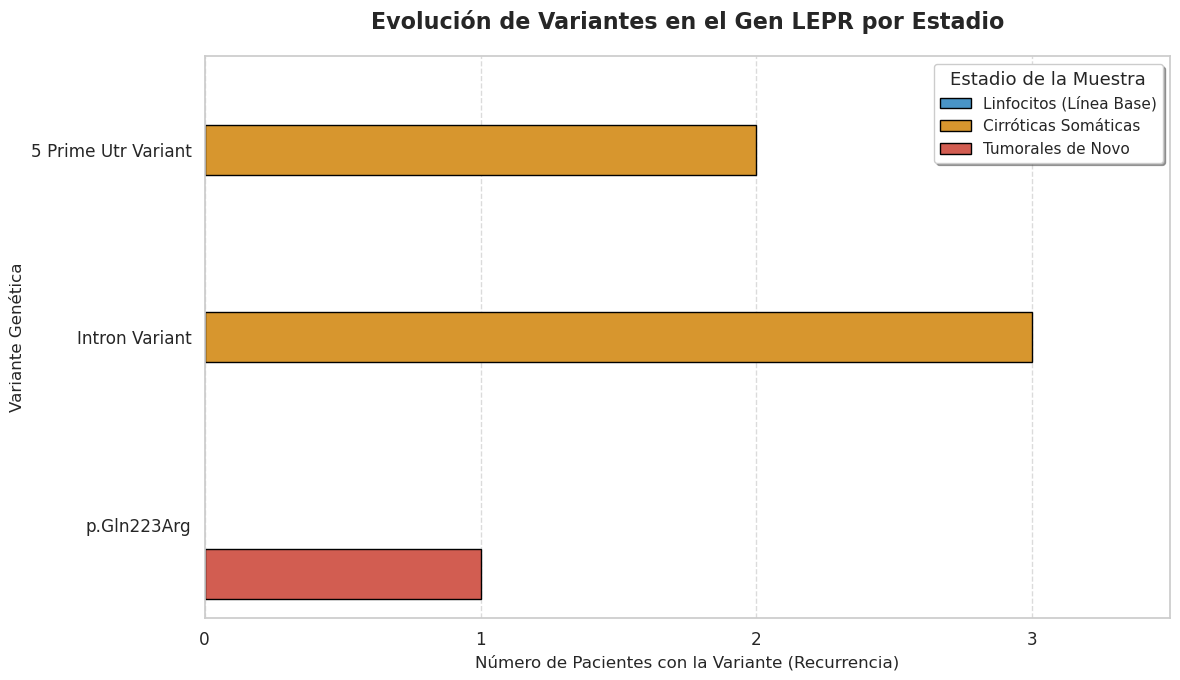

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(" Iniciando Fase 2b: Análisis de Evolución de Variantes en el Gen LEPR.")
print("="*60)

# --- 1. Carga y Filtrado de datos para LEPR ---
# Diccionario para almacenar los dataframes de LEPR por estadio
lepr_por_estadio = {}

ficheros_a_revisar = {
    "Linfocitos (Línea Base)": "TODOS_PACIENTES_linfocitos_original_unicas.tsv",
    "Cirróticas Somáticas": "TODOS_PACIENTES_variantes_cirroticas_unicas.tsv",
    "Tumorales de Novo": "TODOS_PACIENTES_variantes_tumorales_unicas.tsv"
}

print("Cargando y filtrando datos para el gen LEPR...")
for estadio, nombre_fichero in ficheros_a_revisar.items():
    ruta_fichero = os.path.join(directorio_salida, nombre_fichero)
    try:
        df_completo = pd.read_csv(ruta_fichero, sep='\t', low_memory=False)
        # Filtrar por el símbolo del gen 'LEPR' y guardar
        variantes_lepr = df_completo[df_completo['SYMBOL'] == 'LEPR'].copy()
        variantes_lepr['Estadio'] = estadio # Añadir columna para identificar el origen
        lepr_por_estadio[estadio] = variantes_lepr
        print(f"  -> Encontradas {len(variantes_lepr)} variantes de LEPR en: {estadio}")
    except FileNotFoundError:
        print(f" ERROR: No se encontró el fichero {nombre_fichero}.")

# --- 2. Mostrar tablas de variantes por estadio ---
print("\n" + "="*60)
print("Tablas de variantes encontradas en LEPR por cada estadio:")
for estadio, df in lepr_por_estadio.items():
    print(f"\n--- Estadio: {estadio} ---")
    if not df.empty:
        # Seleccionamos las columnas más relevantes para mostrar
        columnas_display = ['Pacientes', 'Num_Pacientes', 'Location', 'Allele', 'Consequence', 'IMPACT', 'HGVSp']
        display(df[columnas_display])
    else:
        print("No se encontraron variantes.")

# --- 3. Procesamiento de Datos para la Visualización ---
# Combina los DataFrames de cada estadio (linfocito, cirrótico, tumoral) en uno solo para facilitar el manejo.
df_lepr_evolucion = pd.concat(lepr_por_estadio.values(), ignore_index=True)

# Se inicializa un DataFrame vacío que contendrá los datos listos para graficar.
df_plot = pd.DataFrame()
if not df_lepr_evolucion.empty:
    print("\n" + "="*60)
    print("Procesando y deduplicando datos para el gráfico...")

    # Se crea un identificador único para cada evento genético combinando su localización y el alelo.
    df_lepr_evolucion['genomic_id'] = df_lepr_evolucion['Location'] + '_' + df_lepr_evolucion['Allele']
    
    grouped = df_lepr_evolucion.groupby('genomic_id')
    
    processed_rows = []
    for genomic_id, group in grouped:
        hgvsp_series = group['HGVSp'].dropna()
        label = ""
        # Se prioriza la etiqueta de proteína (ej. p.Gln223Arg) si existe, por ser más informativa.
        if not hgvsp_series.empty and any('p.' in str(s) for s in hgvsp_series):
            hgvsp = hgvsp_series[hgvsp_series.str.contains('p.')].iloc[0]
            label = str(hgvsp).split(':')[-1] 
        else:
            consequence = group['Consequence'].iloc[0]
            label = consequence.replace('_', ' ').title() 

        for estadio, df_estadio in group.groupby('Estadio'):
            processed_rows.append({
                'variant_label': label,
                'Estadio': estadio,
                'Num_Pacientes': df_estadio['Num_Pacientes'].iloc[0]
            })
    
    df_plot = pd.DataFrame(processed_rows)
    print("Datos procesados y listos para visualizar.")

# --- 4. Visualización Gráfica con Barplot Ordenado ---
if not df_plot.empty:
    print("Generando gráfico de evolución de variantes de LEPR...")
    
    estadio_order_list = ['Linfocitos (Línea Base)', 'Cirróticas Somáticas', 'Tumorales de Novo']
    df_plot['Estadio'] = pd.Categorical(df_plot['Estadio'], categories=estadio_order_list, ordered=True)
    df_plot_sorted = df_plot.sort_values('Estadio')
    y_axis_order = df_plot_sorted['variant_label'].unique()
    sns.set_theme(style="whitegrid", font_scale=1.1)
    plt.figure(figsize=(12, 7))

    # Se crea el gráfico de barras con Seaborn.
    barplot = sns.barplot(
        x='Num_Pacientes',       
        y='variant_label',       
        hue='Estadio',           
        data=df_plot,            
        palette={'Linfocitos (Línea Base)': '#3498db', 'Cirróticas Somáticas': '#f39c12', 'Tumorales de Novo': '#e74c3c'}, 
        hue_order=estadio_order_list, 
        order=y_axis_order,      
        edgecolor="black",       
        dodge=True              
    )

    # Se añaden y personalizan los títulos y etiquetas de los ejes.
    plt.title('Evolución de Variantes en el Gen LEPR por Estadio', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Número de Pacientes con la Variante (Recurrencia)', fontsize=12)
    plt.ylabel('Variante Genética', fontsize=12)
    plt.legend(title='Estadio de la Muestra', title_fontsize='13', fontsize='11', frameon=True, shadow=True)
    
    # Se ajustan las marcas y la rejilla del eje X para mayor claridad.
    plt.xticks(range(int(df_plot['Num_Pacientes'].max()) + 2))
    plt.xlim(0, df_plot['Num_Pacientes'].max() + 0.5)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo se encontraron variantes en LEPR para visualizar.")

## Fase 3: Filtrado de Variantes Tumorales por Relevancia Biológica

 Iniciando Fase 3: Filtrado de variantes tumorales y visualización de resultados.
Cargado. Número inicial de variantes tumorales únicas a filtrar: 54884
 -> Después de filtrar por IMPACT ('HIGH' o 'MODERATE'): 5526 variantes restantes.

 Filtrado final completado.
Total de variantes de alta confianza encontradas: 1802
   -> Fichero filtrado guardado en: /home/alumno09/TareaADO/tablas/TODOS_PACIENTES_variantes_filtradas_alta_confianza.tsv

Top variantes de alta confianza (ordenadas por recurrencia):


,Pacientes,Num_Pacientes,Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,...,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,PHENOTYPES,variant_id
97,"PAC1, PAC4",2,.,NC_000005.10:103097705-103097705,A,missense_variant,MODERATE,GIN1,ENSG00000145723,Transcript,...,"0,1","1,1","29180661,33777101",-,-,-,-,-,-,NC_000005.10:103097705-103097705_A
191,"PAC1, PAC4",2,.,NC_000005.10:147906491-147906491,A,missense_variant,MODERATE,C5orf46,ENSG00000178776,Transcript,...,"0,1","0,1","21302341,30796769",-,-,-,-,-,-,NC_000005.10:147906491-147906491_A
192,"PAC1, PAC4",2,.,NC_000005.10:147906491-147906491,A,missense_variant,MODERATE,C5orf46,ENSG00000178776,Transcript,...,"0,1","0,1","21302341,30796769",-,-,-,-,-,-,NC_000005.10:147906491-147906491_A
220,"PAC1, PAC4",2,.,NC_000005.10:148213934-148213934,A,missense_variant,MODERATE,SPINK6,ENSG00000178172,Transcript,...,"0,1","0,1",27733454,-,-,-,-,-,-,NC_000005.10:148213934-148213934_A
221,"PAC1, PAC4",2,.,NC_000005.10:148213934-148213934,A,missense_variant,MODERATE,SPINK6,ENSG00000178172,Transcript,...,"0,1","0,1",27733454,-,-,-,-,-,-,NC_000005.10:148213934-148213934_A
222,"PAC1, PAC4",2,.,NC_000005.10:148213934-148213934,A,missense_variant,MODERATE,SPINK6,ENSG00000178172,Transcript,...,"0,1","0,1",27733454,-,-,-,-,-,-,NC_000005.10:148213934-148213934_A
454,"PAC1, PAC4",2,.,NC_000006.12:70234554-70234554,C,missense_variant,MODERATE,COL9A1,ENSG00000112280,Transcript,...,"0,1","1,1","25741868,25774918,27245218",-,-,-,-,-,-,NC_000006.12:70234554-70234554_C
455,"PAC1, PAC4",2,.,NC_000006.12:70234554-70234554,C,missense_variant,MODERATE,COL9A1,ENSG00000112280,Transcript,...,"0,1","1,1","25741868,25774918,27245218",-,-,-,-,-,-,NC_000006.12:70234554-70234554_C
457,"PAC1, PAC4",2,.,NC_000006.12:70234554-70234554,C,missense_variant,MODERATE,COL9A1,ENSG00000112280,Transcript,...,"0,1","1,1","25741868,25774918,27245218",-,-,-,-,-,-,NC_000006.12:70234554-70234554_C
515,"PAC1, PAC4",2,.,NC_000006.12:65295995-65295995,T,missense_variant,MODERATE,EYS,ENSG00000188107,Transcript,...,"0,1","1,1",22363543,-,-,-,-,-,-,NC_000006.12:65295995-65295995_T



 Iniciando visualización de resultados...


/tmp/ipykernel_1835055/1164402052.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IMPACT', data=df_tumorales_alta_confianza, palette='viridis', order=['HIGH', 'MODERATE'])


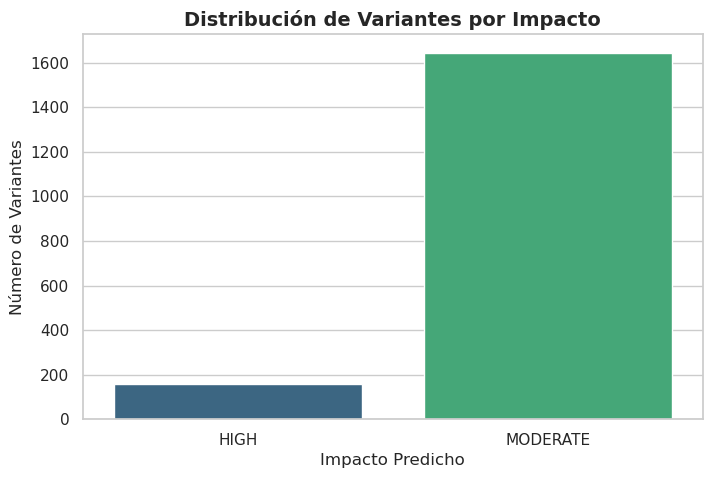

/tmp/ipykernel_1835055/1164402052.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_consequences.index, x=top_10_consequences.values, palette='plasma', orient='h')


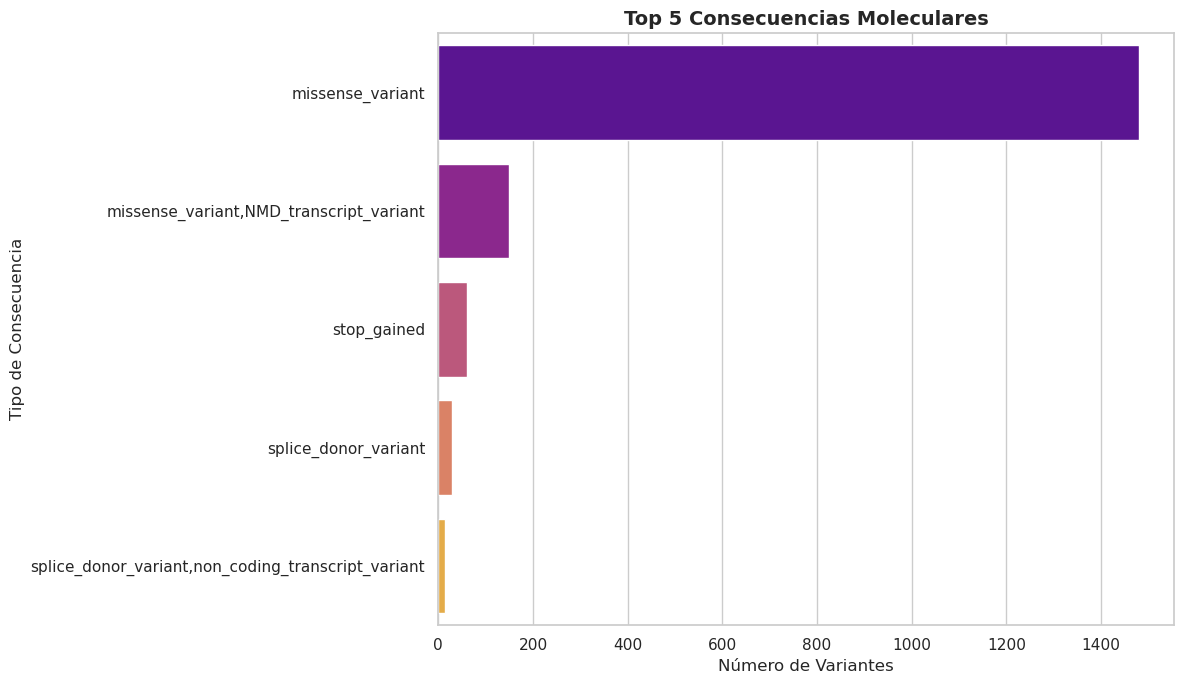

/tmp/ipykernel_1835055/1164402052.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_genes.index, x=top_15_genes.values, palette='magma', orient='h')


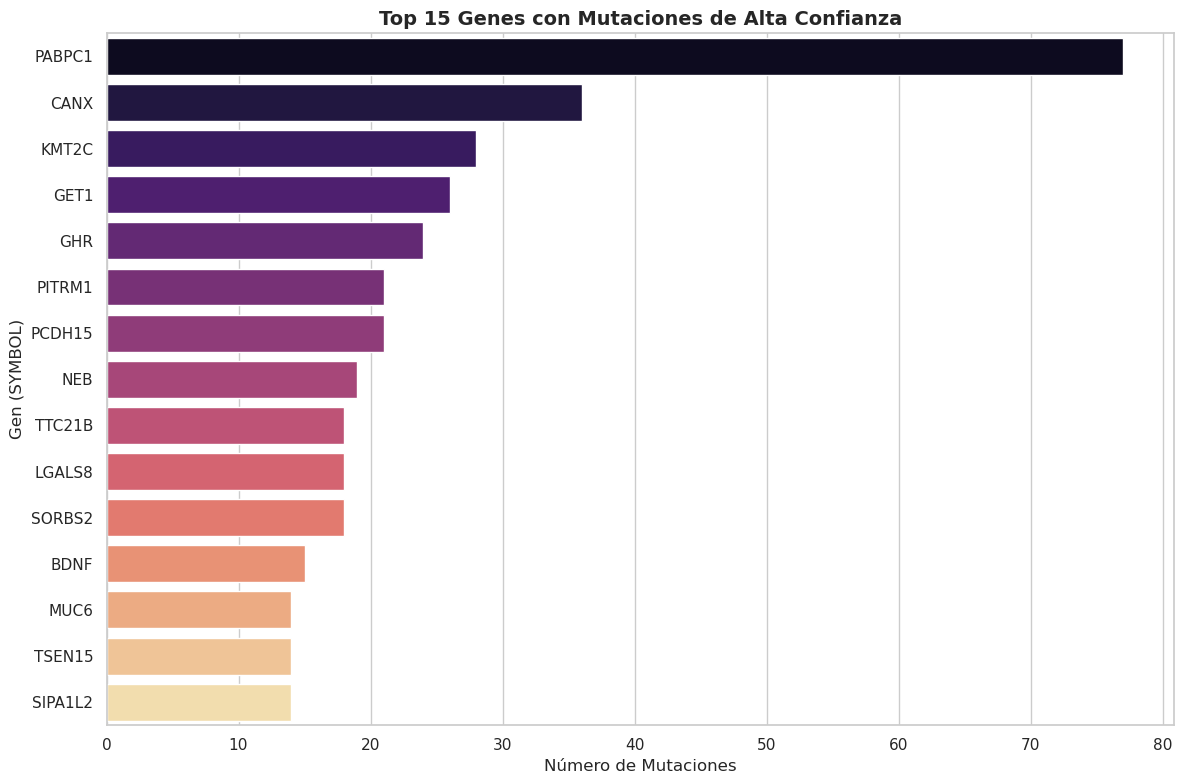

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print(" Iniciando Fase 3: Filtrado de variantes tumorales y visualización de resultados.")
print("="*60)

# Cargar el fichero de variantes tumorales únicas que generamos en la Fase 2a
ruta_tumorales_unicas = os.path.join(directorio_salida, 'TODOS_PACIENTES_variantes_tumorales_unicas.tsv')
try:
    df_a_filtrar = pd.read_csv(ruta_tumorales_unicas, sep='\t', low_memory=False)
    print(f"Cargado. Número inicial de variantes tumorales únicas a filtrar: {len(df_a_filtrar)}")
except FileNotFoundError:
    print(f" ERROR: No se encontró el fichero {ruta_tumorales_unicas}. Ejecuta la celda de la Fase 2a primero.")
    # Si no podemos cargar el fichero, detenemos la ejecución de esta celda
    df_a_filtrar = None

if df_a_filtrar is not None:
    # --- Filtro 1: Impacto Funcional ('HIGH' o 'MODERATE') ---
    filtro_impacto = df_a_filtrar['IMPACT'].isin(['HIGH', 'MODERATE'])
    df_filtrado_impacto = df_a_filtrar[filtro_impacto].copy() # Usamos .copy() para evitar SettingWithCopyWarning
    print(f" -> Después de filtrar por IMPACT ('HIGH' o 'MODERATE'): {len(df_filtrado_impacto)} variantes restantes.")

    # --- Filtro 2: Predicción de Patogenicidad (SIFT y PolyPhen) ---
    df_filtrado_impacto['SIFT'] = df_filtrado_impacto['SIFT'].fillna('')
    df_filtrado_impacto['PolyPhen'] = df_filtrado_impacto['PolyPhen'].fillna('')
    filtro_sift = df_filtrado_impacto['SIFT'].str.contains('deleterious')
    filtro_polyphen = df_filtrado_impacto['PolyPhen'].str.contains('damaging')
    condicion_final = (df_filtrado_impacto['IMPACT'] == 'HIGH') | \
                      ((df_filtrado_impacto['IMPACT'] == 'MODERATE') & (filtro_sift | filtro_polyphen))

    # Aplicamos el filtro final
    df_tumorales_alta_confianza = df_filtrado_impacto[condicion_final]

    print(f"\n Filtrado final completado.")
    print(f"Total de variantes de alta confianza encontradas: {len(df_tumorales_alta_confianza)}")

    # Guardar el resultado
    ruta_filtrado = os.path.join(directorio_salida, 'TODOS_PACIENTES_variantes_filtradas_alta_confianza.tsv')
    df_tumorales_alta_confianza.to_csv(ruta_filtrado, sep='\t', index=False)
    print(f"   -> Fichero filtrado guardado en: {ruta_filtrado}")

    # Mostrar las variantes más recurrentes de alta confianza
    print("\nTop variantes de alta confianza (ordenadas por recurrencia):")
    display(df_tumorales_alta_confianza.head(15))

    # --- SECCIÓN DE VISUALIZACIÓN GRÁFICA ---
    print("\n" + "="*60)
    print(" Iniciando visualización de resultados...")
    
    # Configuración de estilo para los gráficos
    sns.set(style="whitegrid")

    # Gráfico 1: Distribución por Impacto
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IMPACT', data=df_tumorales_alta_confianza, palette='viridis', order=['HIGH', 'MODERATE'])
    plt.title('Distribución de Variantes por Impacto', fontsize=14, fontweight='bold')
    plt.xlabel('Impacto Predicho', fontsize=12)
    plt.ylabel('Número de Variantes', fontsize=12)
    plt.show()

    # Gráfico 2: Top 5 Consecuencias moleculares
    plt.figure(figsize=(12, 7))
    top_10_consequences = df_tumorales_alta_confianza['Consequence'].value_counts().nlargest(5)
    sns.barplot(y=top_10_consequences.index, x=top_10_consequences.values, palette='plasma', orient='h')
    plt.title('Top 5 Consecuencias Moleculares', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Variantes', fontsize=12)
    plt.ylabel('Tipo de Consecuencia', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Gráfico 3: Top 15 Genes más mutados
    plt.figure(figsize=(12, 8))
    top_15_genes = df_tumorales_alta_confianza['SYMBOL'].value_counts().nlargest(15)
    sns.barplot(y=top_15_genes.index, x=top_15_genes.values, palette='magma', orient='h')
    plt.title('Top 15 Genes con Mutaciones de Alta Confianza', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Mutaciones', fontsize=12)
    plt.ylabel('Gen (SYMBOL)', fontsize=12)
    plt.tight_layout()
    plt.show()

## Fase 4: Generación de Lista de Genes para Análisis de Rutas

In [7]:
print(" Iniciando Fase 4: Generando lista de genes de alta confianza para análisis de rutas (pathways).")
print("="*60)

try:
    # Usamos el DataFrame filtrado de la celda anterior ('df_tumorales_alta_confianza')
    # Extraemos la columna 'SYMBOL', eliminamos posibles valores nulos (NaN) y obtenemos los valores únicos.
    genes_alta_confianza = df_tumorales_alta_confianza['SYMBOL'].dropna().unique()
    
    # Crear un DataFrame con la lista de genes para guardarla fácilmente
    df_genes = pd.DataFrame(genes_alta_confianza, columns=['Gene_Symbol'])
    
    # Definir las rutas de salida
    ruta_lista_genes_txt = os.path.join(directorio_salida, 'lista_genes_alta_confianza.txt')
    ruta_lista_genes_tsv = os.path.join(directorio_salida, 'lista_genes_alta_confianza.tsv')
    
    # Guardar en un fichero de texto simple (un gen por línea, sin cabecera)
    df_genes.to_csv(ruta_lista_genes_txt, header=False, index=False)
    
    # Guardar también en formato TSV (con cabecera) por si fuera necesario
    df_genes.to_csv(ruta_lista_genes_tsv, sep='\t', index=False)

    print(f" Se ha generado una lista con {len(df_genes)} genes únicos de alto impacto.")
    print(f"   -> Lista para análisis de rutas guardada en: {ruta_lista_genes_txt}")
    print("\nPASO FINAL: Copia y pega el contenido del fichero .txt en una herramienta de análisis de rutas como DAVID, g:Profiler o Reactome.")
    
    print("\nPrimeros 20 genes de la lista:")
    print(df_genes.head(20).to_string(index=False))

except NameError:
    print(" ERROR: El DataFrame 'df_tumorales_alta_confianza' no fue encontrado.")
    print("   Asegúrate de haber ejecutado la celda de la Fase 3 correctamente antes de ejecutar esta.")

 Iniciando Fase 4: Generando lista de genes de alta confianza para análisis de rutas (pathways).
 Se ha generado una lista con 524 genes únicos de alto impacto.
   -> Lista para análisis de rutas guardada en: /home/alumno09/TareaADO/tablas/lista_genes_alta_confianza.txt

PASO FINAL: Copia y pega el contenido del fichero .txt en una herramienta de análisis de rutas como DAVID, g:Profiler o Reactome.

Primeros 20 genes de la lista:
Gene_Symbol
       GIN1
    C5orf46
     SPINK6
     COL9A1
        EYS
     ADGRV1
       VNN1
       GBP2
    SULT1C3
     OR2T12
      SCN3A
          -
        TNN
     RNASEL
      PTCD3
      HTR3C
     RCBTB1
     B3GLCT
      P4HA3
       MUC6
